### Aim of the Notebook:
The aim of this project is to build a predictive model that determines whether a household is occupied during standard daytime hours on weekdays using demographic, appliance ownership, and behavioral data collected from Australian households as part of the Smart Grid Smart City trial. This model will support smarter energy planning by enabling utility providers to tailor services, manage demand more effectively, and develop targeted engagement strategies for energy-saving programs.

In [121]:
#importing necessary libraries required
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
pd.set_option('display.max_columns', None)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
#Reading the dataset called customer_household_data from "https://data.gov.au/data/dataset/smart-grid-smart-city-customer-trial-data"
data = pd.read_csv("sgsc-ct_customer-household-data-revised.csv")

In [4]:
#Checking the size of the dataset using the function shape()
data.shape

(78720, 46)

In [5]:
#Displaying all the columns that are available in the dataset
data.columns

Index(['CUSTOMER_KEY', 'TRIAL_CUSTOMER_TYPE', 'CONTROL_GROUP_FLAG',
       'TARIFF_PRODUCT_CD', 'FEEDBACK_TECH1_PRODUCT_CD',
       'FEEDBACK_TECH2_PRODUCT_CD', 'LIFESTYLE_AUDIT_PRODUCT_CD',
       'INFERRED_CELL', 'VERIFIED_CELL', 'SERVICE_TYPE', 'GENERAL_SUPPLY_CNT',
       'CONTROLLED_LOAD_CNT', 'NET_SOLAR_CNT', 'GROSS_SOLAR_CNT',
       'OTHER_LOAD_CNT', 'SERVICE_LOC_STATUS_NAME', 'ASSRTD_CLIMATE_ZONE_CD',
       'ASSRTD_CLIMATE_ZONE_DESC', 'ASSRTD_DWELLING_TYPE_CD',
       'ASSRTD_GAS_USAGE_GROUP_CD', 'ASSRTD_ELECTRICITY_USE_GRP_CD',
       'DWELLING_TYPE_CD', 'DRYER_USAGE_CD', 'REDUCING_CONSUMPTION_CD',
       'AIRCON_TYPE_CD', 'NUM_REFRIGERATORS', 'NUM_ROOMS_HEATED',
       'HAS_GENERATION', 'HAS_INTERNET_ACCESS', 'HAS_GAS', 'HAS_GAS_HEATING',
       'HAS_GAS_HOT_WATER', 'HAS_GAS_COOKING', 'HAS_POOLPUMP', 'HAS_AIRCON',
       'HAS_GAS_OTHER_APPLIANCE', 'IS_HOME_DURING_DAYTIME',
       'HAS_AGREED_TO_SMS', 'SMART_METER_INSTALLATION_DATE',
       'LIFESTYLE_AUDIT_PERFORMED_DATE', 

In [6]:
#Displaying the first 10 values of the dataset to get an understanding of the dataset. 
data.head(10)

,CUSTOMER_KEY,TRIAL_CUSTOMER_TYPE,CONTROL_GROUP_FLAG,TARIFF_PRODUCT_CD,FEEDBACK_TECH1_PRODUCT_CD,FEEDBACK_TECH2_PRODUCT_CD,LIFESTYLE_AUDIT_PRODUCT_CD,INFERRED_CELL,VERIFIED_CELL,SERVICE_TYPE,GENERAL_SUPPLY_CNT,CONTROLLED_LOAD_CNT,NET_SOLAR_CNT,GROSS_SOLAR_CNT,OTHER_LOAD_CNT,SERVICE_LOC_STATUS_NAME,ASSRTD_CLIMATE_ZONE_CD,ASSRTD_CLIMATE_ZONE_DESC,ASSRTD_DWELLING_TYPE_CD,ASSRTD_GAS_USAGE_GROUP_CD,ASSRTD_ELECTRICITY_USE_GRP_CD,DWELLING_TYPE_CD,DRYER_USAGE_CD,REDUCING_CONSUMPTION_CD,AIRCON_TYPE_CD,NUM_REFRIGERATORS,NUM_ROOMS_HEATED,HAS_GENERATION,HAS_INTERNET_ACCESS,HAS_GAS,HAS_GAS_HEATING,HAS_GAS_HOT_WATER,HAS_GAS_COOKING,HAS_POOLPUMP,HAS_AIRCON,HAS_GAS_OTHER_APPLIANCE,IS_HOME_DURING_DAYTIME,HAS_AGREED_TO_SMS,SMART_METER_INSTALLATION_DATE,LIFESTYLE_AUDIT_PERFORMED_DATE,PROVISIONING_COMPLETE_DATE,OFFER_WITHDRAWN_DATE,ACCEPTANCE_WITHDRAWN_DATE,OPERATION_START_DATE,OPERATION_FINISH_DATE,AGREEMENT_EXIT_REASON
0,8459115,Retail,N,NaN,NaN,NaN,NaN,14,NaN,Domestic,1,0,0,0,0,Not a Customer,5,Warm temperate,NotUnit,MED,LOW,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10015988,Retail,N,NaN,NaN,NaN,NaN,60,NaN,Domestic,1,0,0,0,0,Not a Customer,5,Warm temperate,NotUnit,LOW,MED,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8922450,Retail,N,NaN,NaN,NaN,NaN,28,NaN,Domestic,1,0,0,0,0,Not a Customer,5,Warm temperate,NotUnit,HI,LOW,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8922462,Network,N,NaN,NaN,NaN,NaN,28,NaN,Domestic,1,0,0,0,0,Not a Customer,5,Warm temperate,NotUnit,HI,LOW,NaN,NaN,NaN,NaN,NaN,NaN,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,14-Jul-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8922472,Network,N,NETDPRPPE,NaN,NaN,NaN,64,64.0,Domestic,1,0,0,0,0,Trial Closed,5,Warm temperate,NotUnit,HI,MED,SeparateHouse,LOW,MED,SplitSystem,2.0,0.0,N,Y,Y,N,Y,Y,N,Y,N,N,Y,3-Feb-12,NaN,18-Oct-12,NaN,NaN,18-Oct-12,28-Feb-14,OPTOUTNETWKCLOSE
5,11189125,Retail,N,NaN,NaN,NaN,NaN,1,NaN,Domestic,1,0,0,0,0,Not a Customer,6,Mild temperate,NotUnit,LOW,LOW,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11189127,Retail,N,NaN,NaN,NaN,NaN,37,NaN,Domestic,1,0,0,0,0,Not a Customer,6,Mild temperate,NotUnit,LOW,MED,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11189133,Retail,N,NaN,NaN,NaN,NaN,73,NaN,Domestic,1,0,0,0,0,Not a Customer,6,Mild temperate,NotUnit,LOW,HI,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11189135,Retail,N,NaN,NaN,NaN,NaN,37,NaN,Domestic,1,0,0,0,0,Not a Customer,6,Mild temperate,NotUnit,LOW,MED,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11189137,Retail,N,NaN,NaN,NaN,NaN,1,NaN,Domestic,1,0,0,0,0,Not a Customer,6,Mild temperate,NotUnit,LOW,LOW,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dropping irrelevant columns for the goal of our dataset and based on the dataset description provided by the source
# List of irrelevant or ID-like columns to drop
cols_to_drop = [
    'CUSTOMER_KEY', 'INFERRED_CELL', 'VERIFIED_CELL',
    'SERVICE_TYPE', 'SMART_METER_INSTALLATION_DATE', 'LIFESTYLE_AUDIT_PERFORMED_DATE',
    'PROVISIONING_COMPLETE_DATE', 'OFFER_WITHDRAWN_DATE',
    'ACCEPTANCE_WITHDRAWN_DATE', 'OPERATION_START_DATE',
    'OPERATION_FINISH_DATE', 'AGREEMENT_EXIT_REASON'
]

# Drop them from the DataFrame
data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Confirm removal
print("Remaining columns after dropping:", data.shape[1])

Remaining columns after dropping: 34


In [8]:
data.columns

Index(['TRIAL_CUSTOMER_TYPE', 'CONTROL_GROUP_FLAG', 'TARIFF_PRODUCT_CD',
       'FEEDBACK_TECH1_PRODUCT_CD', 'FEEDBACK_TECH2_PRODUCT_CD',
       'LIFESTYLE_AUDIT_PRODUCT_CD', 'GENERAL_SUPPLY_CNT',
       'CONTROLLED_LOAD_CNT', 'NET_SOLAR_CNT', 'GROSS_SOLAR_CNT',
       'OTHER_LOAD_CNT', 'SERVICE_LOC_STATUS_NAME', 'ASSRTD_CLIMATE_ZONE_CD',
       'ASSRTD_CLIMATE_ZONE_DESC', 'ASSRTD_DWELLING_TYPE_CD',
       'ASSRTD_GAS_USAGE_GROUP_CD', 'ASSRTD_ELECTRICITY_USE_GRP_CD',
       'DWELLING_TYPE_CD', 'DRYER_USAGE_CD', 'REDUCING_CONSUMPTION_CD',
       'AIRCON_TYPE_CD', 'NUM_REFRIGERATORS', 'NUM_ROOMS_HEATED',
       'HAS_GENERATION', 'HAS_INTERNET_ACCESS', 'HAS_GAS', 'HAS_GAS_HEATING',
       'HAS_GAS_HOT_WATER', 'HAS_GAS_COOKING', 'HAS_POOLPUMP', 'HAS_AIRCON',
       'HAS_GAS_OTHER_APPLIANCE', 'IS_HOME_DURING_DAYTIME',
       'HAS_AGREED_TO_SMS'],
      dtype='object')

In [9]:
extra_irrelevant_cols = [
    'TRIAL_CUSTOMER_TYPE', 'CONTROL_GROUP_FLAG', 'TARIFF_PRODUCT_CD',
    'FEEDBACK_TECH1_PRODUCT_CD', 'FEEDBACK_TECH2_PRODUCT_CD',
    'LIFESTYLE_AUDIT_PRODUCT_CD', 'GENERAL_SUPPLY_CNT',
    'CONTROLLED_LOAD_CNT', 'NET_SOLAR_CNT', 'GROSS_SOLAR_CNT',
    'OTHER_LOAD_CNT', 'SERVICE_LOC_STATUS_NAME',
    'ASSRTD_CLIMATE_ZONE_CD', 'HAS_AGREED_TO_SMS','DWELLING_TYPE_CD'
]

data.drop(columns=extra_irrelevant_cols, inplace=True, errors='ignore')

In [10]:
data.columns

Index(['ASSRTD_CLIMATE_ZONE_DESC', 'ASSRTD_DWELLING_TYPE_CD',
       'ASSRTD_GAS_USAGE_GROUP_CD', 'ASSRTD_ELECTRICITY_USE_GRP_CD',
       'DRYER_USAGE_CD', 'REDUCING_CONSUMPTION_CD', 'AIRCON_TYPE_CD',
       'NUM_REFRIGERATORS', 'NUM_ROOMS_HEATED', 'HAS_GENERATION',
       'HAS_INTERNET_ACCESS', 'HAS_GAS', 'HAS_GAS_HEATING',
       'HAS_GAS_HOT_WATER', 'HAS_GAS_COOKING', 'HAS_POOLPUMP', 'HAS_AIRCON',
       'HAS_GAS_OTHER_APPLIANCE', 'IS_HOME_DURING_DAYTIME'],
      dtype='object')

In [11]:
data.shape

(78720, 19)

In [12]:
# Rename columns to user-friendly names
rename_map = {
    'ASSRTD_HHOLD_INCOME_GROUP_CD': 'IncomeGroup',
    'ASSRTD_ELECTRICITY_USE_GRP_CD': 'ElectricityUse',
    'ASSRTD_GAS_USAGE_GROUP_CD': 'GasUse',
    'ASSRTD_DWELLING_TYPE_CD': 'DwellingType',
    'DRYER_USAGE_CD': 'DryerUse',
    'REDUCING_CONSUMPTION_CD': 'ReductionEffort',
    'AIRCON_TYPE_CD': 'AirconType',
    'NUM_REFRIGERATORS': 'NumFridges',
    'NUM_ROOMS_HEATED': 'NumHeatedRooms',
    'HAS_GENERATION': 'HasGeneration',
    'HAS_INTERNET_ACCESS': 'HasInternet',
    'HAS_GAS': 'HasGas',
    'HAS_GAS_HEATING': 'HasGasHeating',
    'HAS_GAS_HOT_WATER': 'HasGasHotWater',
    'HAS_GAS_COOKING': 'HasGasCooking',
    'HAS_POOLPUMP': 'HasPoolPump',
    'HAS_AIRCON': 'HasAircon',
    'HAS_GAS_OTHER_APPLIANCE': 'HasOtherGasAppliance',
    'IS_HOME_DURING_DAYTIME': 'IsHomeDaytime',
    'ASSRTD_CLIMATE_ZONE_DESC': 'ClimateZone'
}

data.rename(columns=rename_map, inplace=True)

In [13]:
data.columns

Index(['ClimateZone', 'DwellingType', 'GasUse', 'ElectricityUse', 'DryerUse',
       'ReductionEffort', 'AirconType', 'NumFridges', 'NumHeatedRooms',
       'HasGeneration', 'HasInternet', 'HasGas', 'HasGasHeating',
       'HasGasHotWater', 'HasGasCooking', 'HasPoolPump', 'HasAircon',
       'HasOtherGasAppliance', 'IsHomeDaytime'],
      dtype='object')

In [14]:
data.head()

,ClimateZone,DwellingType,GasUse,ElectricityUse,DryerUse,ReductionEffort,AirconType,NumFridges,NumHeatedRooms,HasGeneration,HasInternet,HasGas,HasGasHeating,HasGasHotWater,HasGasCooking,HasPoolPump,HasAircon,HasOtherGasAppliance,IsHomeDaytime
0,Warm temperate,NotUnit,MED,LOW,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Warm temperate,NotUnit,LOW,MED,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Warm temperate,NotUnit,HI,LOW,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warm temperate,NotUnit,HI,LOW,NaN,NaN,NaN,NaN,NaN,N,Y,Y,Y,Y,Y,Y,Y,Y,Y
4,Warm temperate,NotUnit,HI,MED,LOW,MED,SplitSystem,2.0,0.0,N,Y,Y,N,Y,Y,N,Y,N,N


In [15]:
data.shape

(78720, 19)

data.to_csv("halfcleaned.csv", index = False)

In [17]:
data.dtypes

ClimateZone              object
DwellingType             object
GasUse                   object
ElectricityUse           object
DryerUse                 object
ReductionEffort          object
AirconType               object
NumFridges              float64
NumHeatedRooms          float64
HasGeneration            object
HasInternet              object
HasGas                   object
HasGasHeating            object
HasGasHotWater           object
HasGasCooking            object
HasPoolPump              object
HasAircon                object
HasOtherGasAppliance     object
IsHomeDaytime            object
dtype: object

In [18]:
#Encoding Binary Features
binary_cols = [
    'HasGeneration', 'HasInternet', 'HasGas', 'HasGasHeating',
    'HasGasHotWater', 'HasGasCooking', 'HasPoolPump', 'HasAircon',
    'HasOtherGasAppliance'
]

data[binary_cols] = data[binary_cols].replace({'Y': 1, 'N': 0})

In [19]:
import pandas as pd

# Define ordinal mappings
ordinal_mappings = {
    'GasUse': {'low': 0, 'med': 1, 'high': 2, 'LOW': 0, 'MED': 1, 'HI': 2},
    'ElectricityUse': {'low': 0, 'med': 1, 'high': 2, 'LOW': 0, 'MED': 1, 'HI': 2},
    'DryerUse': {'none': 0, 'low': 1, 'med': 2, 'high': 3, 'NONE': 0, 'LOW': 1, 'MED': 2, 'HIGH': 3},
    'ReductionEffort': {'none': 0, 'low': 1, 'med': 2, 'high': 3, 'NONE': 0, 'LOW': 1, 'MED': 2, 'HIGH': 3}
}

# Apply ordinal replacements
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].replace(mapping)

# Force conversion to numeric types (object → int)
for col in ordinal_mappings.keys():
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [20]:
#One-Hot Encode Nominal Features
nominal_cols = ['ClimateZone', 'DwellingType', 'AirconType']

# One-hot encode nominal features
data = pd.get_dummies(data, columns=nominal_cols, drop_first=False)

In [21]:
#Encode the Target Feature
# Encode the target column
data['IsHomeDaytime'] = data['IsHomeDaytime'].replace({'Y': 1, 'N': 0})

In [22]:
# Confirm no categorical features remain
print("\n✅ Data types after encoding:\n")
print(data.dtypes)

# Peek at the encoded dataset
data.head()


✅ Data types after encoding:

GasUse                          int64
ElectricityUse                  int64
DryerUse                      float64
ReductionEffort               float64
NumFridges                    float64
NumHeatedRooms                float64
HasGeneration                   int64
HasInternet                   float64
HasGas                        float64
HasGasHeating                 float64
HasGasHotWater                float64
HasGasCooking                 float64
HasPoolPump                   float64
HasAircon                     float64
HasOtherGasAppliance          float64
IsHomeDaytime                 float64
ClimateZone_Mild temperate       bool
ClimateZone_Warm temperate       bool
DwellingType_NotUnit             bool
DwellingType_Unit                bool
AirconType_Ducted                bool
AirconType_Other                 bool
AirconType_SplitSystem           bool
dtype: object


,GasUse,ElectricityUse,DryerUse,ReductionEffort,NumFridges,NumHeatedRooms,HasGeneration,HasInternet,HasGas,HasGasHeating,HasGasHotWater,HasGasCooking,HasPoolPump,HasAircon,HasOtherGasAppliance,IsHomeDaytime,ClimateZone_Mild temperate,ClimateZone_Warm temperate,DwellingType_NotUnit,DwellingType_Unit,AirconType_Ducted,AirconType_Other,AirconType_SplitSystem
0,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False,False,False
1,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False,False,False
2,2,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False,False,False
3,2,0,NaN,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
4,2,1,1.0,2.0,2.0,0.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,False,True,True,False,False,False,True


In [23]:
#Checking for missing values
data.isna().sum()

GasUse                            0
ElectricityUse                    0
DryerUse                      66790
ReductionEffort               72609
NumFridges                    66170
NumHeatedRooms                66170
HasGeneration                     0
HasInternet                   60349
HasGas                        68839
HasGasHeating                 68839
HasGasHotWater                68839
HasGasCooking                 68839
HasPoolPump                   60349
HasAircon                     60349
HasOtherGasAppliance          68839
IsHomeDaytime                 60349
ClimateZone_Mild temperate        0
ClimateZone_Warm temperate        0
DwellingType_NotUnit              0
DwellingType_Unit                 0
AirconType_Ducted                 0
AirconType_Other                  0
AirconType_SplitSystem            0
dtype: int64

In [24]:
data.shape

(78720, 23)

In [25]:
data = data.drop(columns=[
    'HasGasHeating', 
    'HasGasHotWater', 
    'HasGasCooking', 
    'HasOtherGasAppliance'
])

In [26]:
data.shape

(78720, 19)

In [27]:
data.isna().sum()

GasUse                            0
ElectricityUse                    0
DryerUse                      66790
ReductionEffort               72609
NumFridges                    66170
NumHeatedRooms                66170
HasGeneration                     0
HasInternet                   60349
HasGas                        68839
HasPoolPump                   60349
HasAircon                     60349
IsHomeDaytime                 60349
ClimateZone_Mild temperate        0
ClimateZone_Warm temperate        0
DwellingType_NotUnit              0
DwellingType_Unit                 0
AirconType_Ducted                 0
AirconType_Other                  0
AirconType_SplitSystem            0
dtype: int64

In [28]:
data = data.drop(columns=['ReductionEffort'])

In [29]:
data.isna().sum()

GasUse                            0
ElectricityUse                    0
DryerUse                      66790
NumFridges                    66170
NumHeatedRooms                66170
HasGeneration                     0
HasInternet                   60349
HasGas                        68839
HasPoolPump                   60349
HasAircon                     60349
IsHomeDaytime                 60349
ClimateZone_Mild temperate        0
ClimateZone_Warm temperate        0
DwellingType_NotUnit              0
DwellingType_Unit                 0
AirconType_Ducted                 0
AirconType_Other                  0
AirconType_SplitSystem            0
dtype: int64

In [30]:
data = data.dropna(subset=['IsHomeDaytime'])

In [31]:
data.isna().sum()

GasUse                           0
ElectricityUse                   0
DryerUse                      6441
NumFridges                    5821
NumHeatedRooms                5821
HasGeneration                    0
HasInternet                      0
HasGas                        8490
HasPoolPump                      0
HasAircon                        0
IsHomeDaytime                    0
ClimateZone_Mild temperate       0
ClimateZone_Warm temperate       0
DwellingType_NotUnit             0
DwellingType_Unit                0
AirconType_Ducted                0
AirconType_Other                 0
AirconType_SplitSystem           0
dtype: int64

In [32]:
data.shape

(18371, 18)

In [33]:
# Columns with missing values to investigate
cols_with_missing = ['DryerUse', 'NumFridges', 'NumHeatedRooms', 'HasGas']

# For each column, display rows where that column is missing
for col in cols_with_missing:
    print(f"\n🔍 Rows where '{col}' is missing (showing with target variable 'IsHomeDaytime'):")
    display(data[data[col].isna()][[col, 'IsHomeDaytime']].head(10))


🔍 Rows where 'DryerUse' is missing (showing with target variable 'IsHomeDaytime'):


,DryerUse,IsHomeDaytime
3,NaN,1.0
44,NaN,1.0
72,NaN,1.0
75,NaN,1.0
77,NaN,1.0
82,NaN,0.0
86,NaN,0.0
92,NaN,1.0
93,NaN,0.0
94,NaN,1.0



🔍 Rows where 'NumFridges' is missing (showing with target variable 'IsHomeDaytime'):


,NumFridges,IsHomeDaytime
3,NaN,1.0
44,NaN,1.0
72,NaN,1.0
75,NaN,1.0
77,NaN,1.0
92,NaN,1.0
94,NaN,1.0
95,NaN,1.0
96,NaN,1.0
97,NaN,1.0



🔍 Rows where 'NumHeatedRooms' is missing (showing with target variable 'IsHomeDaytime'):


,NumHeatedRooms,IsHomeDaytime
3,NaN,1.0
44,NaN,1.0
72,NaN,1.0
75,NaN,1.0
77,NaN,1.0
92,NaN,1.0
94,NaN,1.0
95,NaN,1.0
96,NaN,1.0
97,NaN,1.0



🔍 Rows where 'HasGas' is missing (showing with target variable 'IsHomeDaytime'):


,HasGas,IsHomeDaytime
13,NaN,1.0
15,NaN,0.0
17,NaN,1.0
19,NaN,1.0
27,NaN,1.0
33,NaN,1.0
43,NaN,1.0
62,NaN,1.0
67,NaN,1.0
69,NaN,0.0


In [34]:
for col in cols_with_missing:
    print(f"\n🧩 Preview full rows with missing '{col}':")
    display(data[data[col].isna()].head(10))


🧩 Preview full rows with missing 'DryerUse':


,GasUse,ElectricityUse,DryerUse,NumFridges,NumHeatedRooms,HasGeneration,HasInternet,HasGas,HasPoolPump,HasAircon,IsHomeDaytime,ClimateZone_Mild temperate,ClimateZone_Warm temperate,DwellingType_NotUnit,DwellingType_Unit,AirconType_Ducted,AirconType_Other,AirconType_SplitSystem
3,2,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
44,0,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,True,False,True,False,False,False,False
72,2,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
75,2,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
77,2,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
82,0,1,NaN,1.0,0.0,0,1.0,NaN,0.0,0.0,0.0,False,True,True,False,False,False,False
86,0,0,NaN,1.0,2.0,0,1.0,NaN,0.0,0.0,0.0,False,True,True,False,False,False,False
92,1,1,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
93,0,0,NaN,1.0,0.0,0,1.0,1.0,0.0,1.0,0.0,False,True,False,True,True,False,False
94,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False



🧩 Preview full rows with missing 'NumFridges':


,GasUse,ElectricityUse,DryerUse,NumFridges,NumHeatedRooms,HasGeneration,HasInternet,HasGas,HasPoolPump,HasAircon,IsHomeDaytime,ClimateZone_Mild temperate,ClimateZone_Warm temperate,DwellingType_NotUnit,DwellingType_Unit,AirconType_Ducted,AirconType_Other,AirconType_SplitSystem
3,2,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
44,0,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,True,False,True,False,False,False,False
72,2,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
75,2,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
77,2,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
92,1,1,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
94,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
95,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
96,1,1,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
97,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False



🧩 Preview full rows with missing 'NumHeatedRooms':


,GasUse,ElectricityUse,DryerUse,NumFridges,NumHeatedRooms,HasGeneration,HasInternet,HasGas,HasPoolPump,HasAircon,IsHomeDaytime,ClimateZone_Mild temperate,ClimateZone_Warm temperate,DwellingType_NotUnit,DwellingType_Unit,AirconType_Ducted,AirconType_Other,AirconType_SplitSystem
3,2,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
44,0,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,True,False,True,False,False,False,False
72,2,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
75,2,2,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
77,2,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,True,False,False,False,False
92,1,1,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
94,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
95,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
96,1,1,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False
97,1,0,NaN,NaN,NaN,0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False,False



🧩 Preview full rows with missing 'HasGas':


,GasUse,ElectricityUse,DryerUse,NumFridges,NumHeatedRooms,HasGeneration,HasInternet,HasGas,HasPoolPump,HasAircon,IsHomeDaytime,ClimateZone_Mild temperate,ClimateZone_Warm temperate,DwellingType_NotUnit,DwellingType_Unit,AirconType_Ducted,AirconType_Other,AirconType_SplitSystem
13,0,0,1.0,1.0,0.0,0,1.0,NaN,0.0,1.0,1.0,False,True,True,False,False,False,True
15,0,1,0.0,1.0,0.0,0,1.0,NaN,0.0,0.0,0.0,False,True,True,False,False,False,False
17,0,0,0.0,1.0,0.0,0,1.0,NaN,0.0,0.0,1.0,False,True,False,True,False,False,False
19,0,1,0.0,1.0,0.0,0,1.0,NaN,0.0,1.0,1.0,False,True,True,False,False,False,True
27,1,2,2.0,2.0,2.0,0,1.0,NaN,1.0,1.0,1.0,False,True,True,False,True,False,False
33,1,0,1.0,2.0,0.0,0,0.0,NaN,0.0,1.0,1.0,False,True,True,False,False,True,False
43,1,0,0.0,1.0,1.0,0,0.0,NaN,0.0,1.0,1.0,True,False,True,False,True,False,False
62,2,0,0.0,2.0,0.0,0,1.0,NaN,0.0,0.0,1.0,False,True,True,False,False,False,False
67,0,0,1.0,1.0,0.0,0,1.0,NaN,0.0,1.0,1.0,False,True,True,False,True,False,False
69,0,0,1.0,1.0,0.0,0,1.0,NaN,0.0,0.0,0.0,False,True,True,False,False,False,False


In [35]:
cols_to_check = ['DryerUse', 'NumFridges', 'NumHeatedRooms', 'HasGas']

for col in cols_to_check:
    print(f"\n🧩 Analyzing missing pattern for: {col}")
    print("🔸 Target distribution when missing:")
    print(data[data[col].isna()]['IsHomeDaytime'].value_counts(normalize=True))
    print("🔹 Target distribution when NOT missing:")
    print(data[data[col].notna()]['IsHomeDaytime'].value_counts(normalize=True))


🧩 Analyzing missing pattern for: DryerUse
🔸 Target distribution when missing:
IsHomeDaytime
1.0    0.954044
0.0    0.045956
Name: proportion, dtype: float64
🔹 Target distribution when NOT missing:
IsHomeDaytime
1.0    0.526907
0.0    0.473093
Name: proportion, dtype: float64

🧩 Analyzing missing pattern for: NumFridges
🔸 Target distribution when missing:
IsHomeDaytime
1.0    0.997767
0.0    0.002233
Name: proportion, dtype: float64
🔹 Target distribution when NOT missing:
IsHomeDaytime
1.0    0.527729
0.0    0.472271
Name: proportion, dtype: float64

🧩 Analyzing missing pattern for: NumHeatedRooms
🔸 Target distribution when missing:
IsHomeDaytime
1.0    0.997767
0.0    0.002233
Name: proportion, dtype: float64
🔹 Target distribution when NOT missing:
IsHomeDaytime
1.0    0.527729
0.0    0.472271
Name: proportion, dtype: float64

🧩 Analyzing missing pattern for: HasGas
🔸 Target distribution when missing:
IsHomeDaytime
1.0    0.780212
0.0    0.219788
Name: proportion, dtype: float64
🔹 Tar

In [69]:
data.shape

(18371, 18)

In [71]:
data.to_csv("halfcleaned.csv", index = False)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


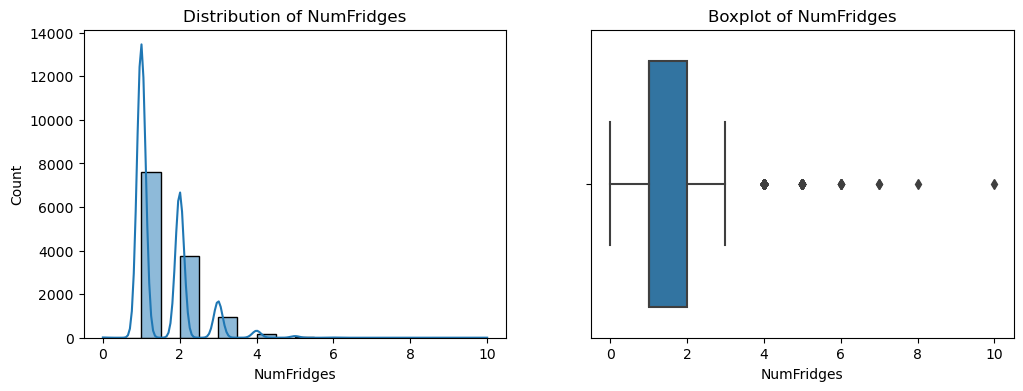

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


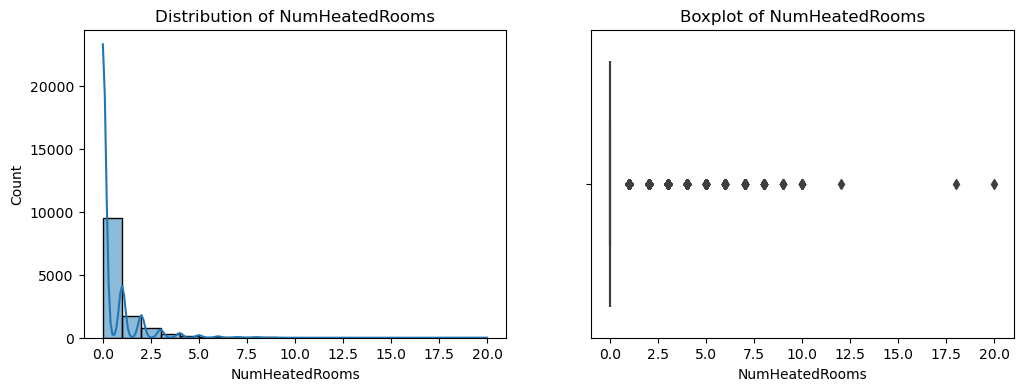

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


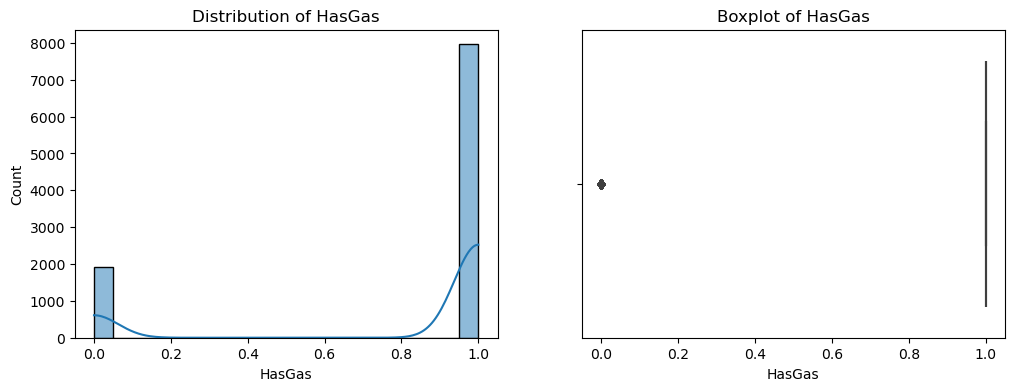

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ['NumFridges', 'NumHeatedRooms', 'HasGas']

for col in cols_to_check:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

In [75]:
# Median imputation for skewed numerical columns
data['NumFridges'].fillna(data['NumFridges'].median(), inplace=True)
data['NumHeatedRooms'].fillna(data['NumHeatedRooms'].median(), inplace=True)

# Mode imputation for binary column
data['HasGas'].fillna(data['HasGas'].mode()[0], inplace=True)

In [77]:
data.isna().sum()

GasUse                           0
ElectricityUse                   0
DryerUse                      6441
NumFridges                       0
NumHeatedRooms                   0
HasGeneration                    0
HasInternet                      0
HasGas                           0
HasPoolPump                      0
HasAircon                        0
IsHomeDaytime                    0
ClimateZone_Mild temperate       0
ClimateZone_Warm temperate       0
DwellingType_NotUnit             0
DwellingType_Unit                0
AirconType_Ducted                0
AirconType_Other                 0
AirconType_SplitSystem           0
dtype: int64

In [79]:
# Impute missing values in DryerUse with its mode
mode_value = data['DryerUse'].mode()[0]
data['DryerUse'].fillna(mode_value, inplace=True)

In [81]:
data.isna().sum()

GasUse                        0
ElectricityUse                0
DryerUse                      0
NumFridges                    0
NumHeatedRooms                0
HasGeneration                 0
HasInternet                   0
HasGas                        0
HasPoolPump                   0
HasAircon                     0
IsHomeDaytime                 0
ClimateZone_Mild temperate    0
ClimateZone_Warm temperate    0
DwellingType_NotUnit          0
DwellingType_Unit             0
AirconType_Ducted             0
AirconType_Other              0
AirconType_SplitSystem        0
dtype: int64

In [83]:
data.to_csv("halfcleaned.csv", index = False)

In [85]:
### STEP 1: Sampling (5000 rows for manageability)
data_sampled = data.sample(n=5000, random_state=42).reset_index(drop=True)

In [89]:
data_sampled.shape

(5000, 18)

In [91]:
### STEP 2: Feature Engineering
# Example: Create a new column that sums up appliance usage flags
appliance_cols = [
    'HasGeneration', 'HasInternet', 'HasGas', 'HasPoolPump',
    'HasAircon', 'AirconType_Ducted', 'AirconType_SplitSystem',
    'AirconType_Other'
]


In [93]:
data_sampled['TotalAppliances'] = data_sampled[appliance_cols].sum(axis=1)


In [95]:
data_sampled.shape

(5000, 19)

In [97]:
### STEP 3: Train/Test Split
X = data_sampled.drop(columns=['IsHomeDaytime'])  # Features
y = data_sampled['IsHomeDaytime']  # Target

In [103]:

# Scaling numeric features (optional but helps SVM)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [105]:

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
## Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
log_preds = logreg.predict(X_test)


In [109]:

print("🔍 Logistic Regression Results:")
print(classification_report(y_test, log_preds))
print("Accuracy:", accuracy_score(y_test, log_preds))

🔍 Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       0.79      0.55      0.65       332
         1.0       0.81      0.93      0.86       668

    accuracy                           0.80      1000
   macro avg       0.80      0.74      0.76      1000
weighted avg       0.80      0.80      0.79      1000

Accuracy: 0.802


In [111]:

## Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [113]:
print("\n🌳 Random Forest Results:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))


🌳 Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       332
         1.0       0.83      0.87      0.85       668

    accuracy                           0.79      1000
   macro avg       0.77      0.75      0.76      1000
weighted avg       0.79      0.79      0.79      1000

Accuracy: 0.794


In [115]:
## Model 3: Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [117]:
print("\n⚙️ SVM Results:")
print(classification_report(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))


⚙️ SVM Results:
              precision    recall  f1-score   support

         0.0       0.86      0.51      0.64       332
         1.0       0.80      0.96      0.87       668

    accuracy                           0.81      1000
   macro avg       0.83      0.73      0.75      1000
weighted avg       0.82      0.81      0.79      1000

Accuracy: 0.809


In [123]:
# Build Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [127]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.7049 - loss: 0.5568 - val_accuracy: 0.8050 - val_loss: 0.4079
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.7941 - loss: 0.4073 - val_accuracy: 0.8163 - val_loss: 0.3735
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8049 - loss: 0.3725 - val_accuracy: 0.8163 - val_loss: 0.3665
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8227 - loss: 0.3610 - val_accuracy: 0.8188 - val_loss: 0.3645
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8120 - loss: 0.3637 - val_accuracy: 0.8125 - val_loss: 0.3585
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8167 - loss: 0.3623 - val_accuracy: 0.8175 - val_loss: 0.3561
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8324 - loss: 0.3428 - val_accuracy: 0.8138 - val_loss: 0.3588
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8290 - loss: 0.3451 - 

In [129]:

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


In [131]:
# Evaluation
print("\n🧠 Neural Network Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


🧠 Neural Network Results:
              precision    recall  f1-score   support

         0.0       0.74      0.62      0.68       332
         1.0       0.83      0.89      0.86       668

    accuracy                           0.80      1000
   macro avg       0.78      0.76      0.77      1000
weighted avg       0.80      0.80      0.80      1000

Accuracy: 0.803
